In [1]:
from EntityResolutionEngine import EntityResolutionEngine as EntityResolutionEngine 

import main as sigmod
import similar_feature_grouping as similar_feature_grouping
import helper as helper
import pandas as pd

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gunesyurdakul/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
sigmod.create_brand_dataframe(d)

NameError: name 'd' is not defined

In [2]:
dataset_path="../datasets/2013_camera_specs/"

dataset_df = sigmod.create_brand_dataframe(dataset_path)
data_dict=sigmod.get_all_keys_values(dataset_path)
#ataset_df['all_features'] = dataset_df['spec_id'].apply(lambda x: data_dict[x])
#dataset_df['page_title'] =  dataset_df['all_features'].apply(lambda x: x['<page title>'])

  8%|▊         | 2/24 [00:00<00:01, 17.07it/s]

Creating df
>>> Creating dataframe...



  0%|          | 0/24 [00:00<?, ?it/s]

>>> Dataframe created successfully!



100%|██████████| 24/24 [00:13<00:00,  1.90it/s]


In [3]:
data_dict['www.eglobalcentral.co.uk//147']

{'<page title>': 'canon eos 7d body digital slr camera',
 'aspect ratio': '3:2 (horizontal; vertical)',
 'battery': 'lp-e6',
 'continuous shooting fps': '8',
 'dimensions w x h x d': '148.2 x 110.7 x 73.5 mm',
 'effective pixels': 'approx. 18 megapixels',
 'focal length fmm': '1.6x',
 'gps': 'optional',
 'hdmi': 'hdmi mini',
 'image processor': 'digic 4',
 'image stabilisation': '',
 'iso sensitivity': 'iso 100-6400, expandable h (equivalent iso 12800)',
 'lcd screen size inch': '3.0',
 'lens mount': 'ef mount',
 'max resolution': '5184 x 3456',
 'microphone': 'built-in monaural microphone, external stereo microphone terminal provided',
 'movie size': '1920 x 1080 1280 x 720 640 x 480',
 'sensor size': '22.3 x 14.9mm',
 'sensor type': 'cmos',
 'shutter speed': '30-1/8000 sec, bulb',
 'storage type': 'type ii cf card, udma-compatible',
 'total pixels': 'approx. 19 megapixels',
 'usb': '2.0',
 'viewfinder': 'optical, 100% coverage',
 'weight inc batteries': '900g',
 'wireless': 'optional

In [4]:
dataset_df[dataset_df['spec_id']=='www.eglobalcentral.co.uk//147']

,source,spec_number,spec_id,page_title,brand
13050,www.eglobalcentral.co.uk,147,www.eglobalcentral.co.uk//147,canon eos 7d slr 19mp,


In [5]:
dataset_df = sigmod.compute_brand_blocking(dataset_df)


309it [00:00, 3088.24it/s]

>>> Computing blocking...


29787it [00:05, 5506.07it/s]
29787it [00:04, 6255.50it/s]


ended
>>> Blocking computed successfully!



In [6]:
labelled_df = pd.read_csv('../datasets/sigmod_large_labelled_dataset.csv')
same_products = sigmod.grouping_same_products_from_labelled_set(labelled_df)

#They all represent the same products
len(labelled_df)

297651

In [7]:
dataset_df = dataset_df.set_index('spec_id')

## EXTRACT MODEL NAMES

In [30]:
grouped = dataset_df.groupby('blocking_key')

In [31]:
grouped.size()

blocking_key
accessory      124
advert           1
aiptek          11
allen            1
alpha          454
argus            8
b+w             25
bell            38
benq            15
canon          736
canonmp          1
casio          224
celestron        3
coleman         41
contax           3
coolpix       1958
creative         1
dahua          632
datamax          1
digiflip         3
discount         1
disney          25
dji              6
drift            4
easypix          9
emerson         11
enxun           30
eos           2441
epson            6
fujifilm      1519
fujitsu          1
garmin           7
ge             157
genius           1
gopro          271
hasselblad      22
hikvision     2000
hooya            1
hoya             7
hp              96
hunter           1
intova          12
iris             5
isaw             3
jvc             10
kenko            4
kodak          769
konica          89
leica          208
lexar           19
lg              23
lytro           20

In [51]:
import re
models={}
for blocking_key in set(dataset_df.blocking_key):
    block_df=grouped.get_group(blocking_key)
    block_df['model']=block_df.page_title.apply(lambda x: [' '.join(x[idx:].split()[:1]) for idx in [x.start() for x in re.finditer(blocking_key+' ', x)]])
    block_df['model']=block_df['model'].apply(lambda x:x[0] if len(x)>0 else '')
    models.update(block_df.groupby('model').size().to_dict())
del models['']

/Users/gunesyurdakul/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/gunesyurdakul/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [52]:
import numpy as np
counts = np.array(list(models.values()))
limit=np.percentile(counts,50)
keys=list(models.keys()).copy()
skip_keys=['sigma','other','tamron','samsung nx','eos 5d','sony mavica','sony digital','sony ccd','hikvision ir','svp','canon ef','leica','vizio','enxun','hasselblad','disney','casio exilim']

for key in keys:    
    if key=='dahua':
        print(models[key]>limit, key in skip_keys)
    if models[key]>limit and (key not in skip_keys) :
        #print(key)

        block_df=grouped.get_group(key)
        if key=='hikvision':
            key='ds'        
        block_df['model']=block_df.page_title.apply(lambda x: [' '.join(x[idx:].split()[:2]) + ' ' for idx in [x.start() for x in re.finditer(key+' ', x)]])
        block_df['model']=block_df['model'].apply(lambda x:x[0] if len(x)>0 else '')
        if key=='ds':
            key='hikvision'
        models[key]=block_df.groupby('model').size().to_dict()


/Users/gunesyurdakul/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/gunesyurdakul/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


True False


In [53]:
models

{'aiptek': 11,
 'allen': 1,
 'alpha': {'': 1,
  'alpha 100 ': 1,
  'alpha 24 ': 1,
  'alpha 24.3mp ': 1,
  'alpha 33 ': 1,
  'alpha 35 ': 3,
  'alpha 5000 ': 2,
  'alpha 6000 ': 1,
  'alpha 7 ': 5,
  'alpha 700 ': 1,
  'alpha 7r ': 2,
  'alpha 7s ': 1,
  'alpha a100 ': 4,
  'alpha a200 ': 4,
  'alpha a230 ': 5,
  'alpha a230l ': 3,
  'alpha a3000 ': 6,
  'alpha a390 ': 2,
  'alpha a5000 ': 2,
  'alpha a58 ': 1,
  'alpha a6000 ': 4,
  'alpha a65 ': 1,
  'alpha dslr ': 71,
  'alpha dslra300k ': 1,
  'alpha dslra500 ': 2,
  'alpha dslt ': 1,
  'alpha e ': 1,
  'alpha frame ': 2,
  'alpha functional ': 1,
  'alpha hvl ': 2,
  'alpha ilca ': 1,
  'alpha ilce ': 11,
  'alpha mount ': 1,
  'alpha nex ': 193,
  'alpha nex3k/b ': 1,
  'alpha qx1 ': 1,
  'alpha slr ': 1,
  'alpha slt ': 105,
  'alpha slta65v ': 1,
  'alpha slta77vm ': 1,
  'alpha stl ': 1,
  'alpha î\x91 ': 4},
 'argus': 8,
 'bell': {'': 13,
  'bell 3 ': 1,
  'bell door ': 1,
  'bell function ': 2,
  'bell howell ': 20,
  'bell 

In [54]:
skip_keys=['sigma','tamron','samsung nx','eos 5d','sony mavica','sony digital','sony ccd','hikvision ir','svp','canon ef','leica','vizio','enxun','hasselblad','disney','casio exilim']

for covering_key in [key for key in models.keys() if type(models[key])==dict]:  
    if covering_key == 'nikon' or covering_key=='hikvision':
        continue
    for key,value in models[covering_key].items(): 
        if models[covering_key][key]>50 and key!='' and (key not in skip_keys):
            block_df=grouped.get_group(covering_key)
            block_df['model']=block_df.page_title.apply(lambda x: [' '.join(x[idx:].split()[:3]) + ' ' for idx in [x.start() for x in re.finditer(key, x)]])
            block_df['model']=block_df['model'].apply(lambda x:x[0] if len(x)>0 else '')
            models[covering_key][key]=block_df.groupby('model').size().to_dict()
            del models[covering_key][key]['']

/Users/gunesyurdakul/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/gunesyurdakul/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [55]:
skip_keys=['sigma','tamron','samsung nx','eos 5d','sony mavica','sony digital','sony ccd','hikvision ir','svp','canon ef','leica','vizio','enxun','hasselblad','disney','casio exilim']

for covering_key in [key for key in models.keys() if type(models[key])==dict]:  
    if covering_key == 'nikon' or covering_key=='hikvision':
        continue
    for key,value in models[covering_key].items(): 
        if type(models[covering_key][key])==dict:
            for sub_key,value_x in models[covering_key][key].items():
                if(sub_key=='panasonic lumix dmc ' or sub_key=='sony cybershot dsc '):
                    print('iceride')
                    block_df=grouped.get_group(covering_key)
                    block_df['model']=block_df.page_title.apply(lambda x: [' '.join(x[idx:].split()[:4]) + ' ' for idx in [x.start() for x in re.finditer(sub_key, x)]])
                    block_df['model']=block_df['model'].apply(lambda x:x[0] if len(x)>0 else '')
                    models[covering_key][key][sub_key]=block_df.groupby('model').size().to_dict()

iceride
iceride


/Users/gunesyurdakul/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/gunesyurdakul/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [56]:
def clean(models_):
    for key,value in list(models_.items()).copy():
        if (len(key.split())>len(list(set(key.split())))) or ('mp ' in key):
            del models_[key]
        elif type(value)==dict:
            clean(models_[key])
        elif (value==1 and 'fujifilm finepix' not in key)or key=='' or value<3: 
            del models_[key]
    return models

In [57]:
models

{'aiptek': 11,
 'allen': 1,
 'alpha': {'': 1,
  'alpha 100 ': 1,
  'alpha 24 ': 1,
  'alpha 24.3mp ': 1,
  'alpha 33 ': 1,
  'alpha 35 ': 3,
  'alpha 5000 ': 2,
  'alpha 6000 ': 1,
  'alpha 7 ': 5,
  'alpha 700 ': 1,
  'alpha 7r ': 2,
  'alpha 7s ': 1,
  'alpha a100 ': 4,
  'alpha a200 ': 4,
  'alpha a230 ': 5,
  'alpha a230l ': 3,
  'alpha a3000 ': 6,
  'alpha a390 ': 2,
  'alpha a5000 ': 2,
  'alpha a58 ': 1,
  'alpha a6000 ': 4,
  'alpha a65 ': 1,
  'alpha dslr ': {'alpha dslr a100 ': 7,
   'alpha dslr a200 ': 9,
   'alpha dslr a230 ': 5,
   'alpha dslr a230y ': 1,
   'alpha dslr a290 ': 2,
   'alpha dslr a300 ': 11,
   'alpha dslr a3000 ': 1,
   'alpha dslr a330 ': 8,
   'alpha dslr a350 ': 6,
   'alpha dslr a350x ': 1,
   'alpha dslr a380 ': 1,
   'alpha dslr a390 ': 2,
   'alpha dslr a500l ': 1,
   'alpha dslr a560 ': 2,
   'alpha dslr a580 ': 3,
   'alpha dslr a700 ': 3,
   'alpha dslr a850 ': 1,
   'alpha dslr a900 ': 1,
   'alpha dslr bag ': 1,
   'alpha dslr slt ': 5},
  'alp

In [58]:
a='nikon nikon'
len(set(a.split())),len(a.split())

(1, 2)

In [59]:
 
def get_model_names(models_,model_names):
    for key,value in list(models_.items()).copy():
        if type(value)!=dict or key in skip_keys:
            model_names.append(key)
        else:
            get_model_names(models_[key],model_names)
    return model_names

In [60]:
models=clean(models)

In [61]:
models

{'aiptek': 11,
 'alpha': {'alpha 35 ': 3,
  'alpha 7 ': 5,
  'alpha a100 ': 4,
  'alpha a200 ': 4,
  'alpha a230 ': 5,
  'alpha a230l ': 3,
  'alpha a3000 ': 6,
  'alpha a6000 ': 4,
  'alpha dslr ': {'alpha dslr a100 ': 7,
   'alpha dslr a200 ': 9,
   'alpha dslr a230 ': 5,
   'alpha dslr a300 ': 11,
   'alpha dslr a330 ': 8,
   'alpha dslr a350 ': 6,
   'alpha dslr a580 ': 3,
   'alpha dslr a700 ': 3,
   'alpha dslr slt ': 5},
  'alpha ilce ': 11,
  'alpha nex ': {'alpha nex 3 ': 21,
   'alpha nex 3n ': 14,
   'alpha nex 5 ': 16,
   'alpha nex 5k ': 3,
   'alpha nex 5n ': 23,
   'alpha nex 5r ': 11,
   'alpha nex 5t ': 12,
   'alpha nex 5tl ': 3,
   'alpha nex 6 ': 22,
   'alpha nex 7 ': 33,
   'alpha nex c3 ': 8,
   'alpha nex f3 ': 16},
  'alpha slt ': {'alpha slt a35 ': 3,
   'alpha slt a37 ': 4,
   'alpha slt a37k ': 3,
   'alpha slt a55 ': 7,
   'alpha slt a57 ': 12,
   'alpha slt a57k ': 3,
   'alpha slt a58 ': 8,
   'alpha slt a58k ': 4,
   'alpha slt a58y ': 3,
   'alpha slt a

In [21]:
model_names=list()
model_name=list()
model_names = get_model_names(models,model_names)

In [62]:
model_names

['philips keychain ',
 'alpha nex 5r ',
 'alpha nex 7 ',
 'alpha nex 5t ',
 'alpha nex f3 ',
 'alpha nex 5 ',
 'alpha nex c3 ',
 'alpha nex 3n ',
 'alpha nex 3 ',
 'alpha nex 6 ',
 'alpha nex 5n ',
 'alpha a230 ',
 'alpha slt a58 ',
 'alpha slt a99 ',
 'alpha slt a57 ',
 'alpha slt a55 ',
 'alpha slt a77v ',
 'alpha slt a77 ',
 'alpha slt a65 ',
 'alpha a3000 ',
 'alpha dslr a300 ',
 'alpha dslr a200 ',
 'alpha dslr a330 ',
 'alpha dslr a230 ',
 'alpha dslr slt ',
 'alpha dslr a350 ',
 'alpha dslr a100 ',
 'alpha 7 ',
 'alpha ilce ',
 'panasonic gf3 ',
 'panasonic gf5 ',
 'panasonic dmc gx1 ',
 'panasonic gx1 ',
 'panasonic h ',
 'panasonic gf2 ',
 'panasonic lumix gf1 ',
 'panasonic lumix gh3 ',
 'panasonic lumix g ',
 'panasonic lumix dmc zs30 ',
 'panasonic lumix dmc gh3 ',
 'panasonic lumix dmc lx2 ',
 'panasonic lumix dmc gx1 ',
 'panasonic lumix dmc gf1 ',
 'panasonic lumix dmc sz7 ',
 'panasonic lumix dmc fh25 ',
 'panasonic lumix dmc fz20 ',
 'panasonic lumix dmc gf2 ',
 'panas

In [63]:
from tqdm import tqdm
def compute_model_blocking(df,blocking_keys):
    """Function used to compute blocks before the matching phase

    Gets a set of blocking keys and assigns to each specification the first blocking key that will match in the
    corresponding page title.

    Args:
        df (pd.DataFrame): The Pandas DataFrame containing specifications and page titles

    Returns:
        df (pd.DataFrame): The Pandas DataFrame containing specifications, page titles and blocking keys
    """

    print('>>> Computing blocking...')
    subgroup_keys = ["coolpix", "powershot", "eos", "alpha"]

    df['model_name'] = ''
    key_list = []
    group_df=df.groupby('blocking_key')
    for blocking_key,value in blocking_keys.items():
        print(blocking_key)
        block_df = group_df.get_group(blocking_key)
        for index, row in tqdm(block_df.iterrows()):
            page_title = row['page_title']
            brand = row['blocking_key']            
            if (brand == "canon" or brand == "nikon" or brand == "sony"):
                for i in subgroup_keys:
                    if i in page_title:
                        page_title=page_title.replace(brand,'')
            page_title=page_title.replace('general electric','ge ')

            if blocking_key in page_title:
                df.at[index, 'model_name'] = blocking_key      
                if type(value)==dict:
                    for sub_key,sub_value in value.items():
                        
                        if brand=='hikvision':
                            if sub_key.replace(brand,'') in page_title:
                                df.at[index, 'model_name'] = sub_key
                                if type(sub_value)==dict:
                                    for sub_key2,sub_value2 in sub_value.items():
                                        if sub_key2.replace(brand,'') in page_title:
                                            df.at[index, 'model_name'] = sub_key2.replace(' '+sub_key,'')
                        
                        if sub_key in page_title:
                            df.at[index, 'model_name'] = sub_key
                            if type(sub_value)==dict:
                                for sub_key2,sub_value2 in sub_value.items():
                                    if sub_key2.replace(brand,'') in page_title or sub_key2.replace(' '+sub_key,'') in page_title:
                                        df.at[index, 'model_name'] = sub_key2.replace(' '+sub_key,'')
                                        if type(sub_value2)==dict:
                                            for sub_key3,sub_value3 in sub_value2.items():
                                                if sub_key3.replace(brand,'') in page_title:
                                                    df.at[index, 'model_name'] = sub_key3


                                    
            else:
                df.at[index, 'model_name'] = brand

                            
    print('>>> Blocking computed successfully!\n')
    return df
 
dataset_df = compute_model_blocking(dataset_df,models)

19it [00:00, 841.90it/s]
44it [00:00, 422.46it/s]

>>> Computing blocking...
philips
alpha


454it [00:00, 477.06it/s]
42it [00:00, 413.22it/s]

panasonic


1312it [00:02, 482.46it/s]
4it [00:00, 586.94it/s]
37it [00:00, 724.00it/s]
20it [00:00, 454.57it/s]
30it [00:00, 832.75it/s]
27it [00:00, 764.07it/s]
0it [00:00, ?it/s]

drift
vizio
lytro
enxun
sakar
ge


157it [00:00, 628.49it/s]
22it [00:00, 1105.76it/s]
55it [00:00, 544.18it/s]

hasselblad
fujifilm


1519it [00:03, 456.69it/s]
86it [00:00, 858.28it/s]

coolpix


1958it [00:02, 727.76it/s]
9it [00:00, 812.06it/s]
25it [00:00, 940.06it/s]
8it [00:00, 982.42it/s]
48it [00:00, 516.22it/s]
3it [00:00, 558.74it/s]
7it [00:00, 543.47it/s]
0it [00:00, ?it/s]

easypix
disney
argus
sanyo
contax
hoya
olympus


1444it [00:02, 593.00it/s]
10it [00:00, 1010.29it/s]
3it [00:00, 1010.43it/s]
3it [00:00, 804.74it/s]
142it [00:00, 998.05it/s] 
0it [00:00, ?it/s]

vtech
celestron
shimano
sigma
lexar


19it [00:00, 536.96it/s]
5it [00:00, 832.67it/s]
41it [00:00, 628.24it/s]
55it [00:00, 545.94it/s]

iris
coleman
konica


89it [00:00, 589.21it/s]
6it [00:00, 1056.54it/s]
50it [00:00, 487.34it/s]

dji
dahua


632it [00:01, 529.83it/s]
44it [00:00, 434.55it/s]

hikvision


2000it [00:04, 451.04it/s]
61it [00:00, 603.80it/s]

sony


2784it [00:06, 431.04it/s]
9it [00:00, 833.49it/s]
68it [00:00, 676.45it/s]

minox
eos


2441it [00:04, 544.88it/s]
11it [00:00, 933.56it/s]
8it [00:00, 1066.24it/s]
55it [00:00, 547.06it/s]

emerson
mustek
pentax


723it [00:01, 600.05it/s]
4it [00:00, 814.51it/s]
11it [00:00, 973.28it/s]
102it [00:00, 1011.05it/s]

kenko
aiptek
leica


208it [00:00, 1023.04it/s]
9it [00:00, 1286.64it/s]
3it [00:00, 1163.25it/s]
59it [00:00, 587.14it/s]

yourdeal
isaw
kodak


769it [00:01, 509.20it/s]
51it [00:00, 1129.87it/s]
53it [00:00, 521.67it/s]

svp
vivitar


200it [00:00, 496.55it/s]
41it [00:00, 408.09it/s]

casio


224it [00:00, 462.05it/s]
69it [00:00, 685.09it/s]

canon


736it [00:01, 671.27it/s]
48it [00:00, 477.83it/s]

hp


96it [00:00, 406.14it/s]
9it [00:00, 982.32it/s]
7it [00:00, 800.81it/s]
39it [00:00, 384.02it/s]

sekonic
garmin
gopro


271it [00:00, 499.51it/s]
121it [00:00, 645.43it/s]
4it [00:00, 848.02it/s]
0it [00:00, ?it/s]

polaroid
pioneer
benq


15it [00:00, 1030.85it/s]
14it [00:00, 697.76it/s]
12it [00:00, 830.50it/s]
3it [00:00, 799.32it/s]
69it [00:00, 687.57it/s]

sandisk
intova
digiflip
samsung


1077it [00:01, 649.53it/s]
96it [00:00, 1230.20it/s]
3it [00:00, 758.56it/s]
17it [00:00, 925.38it/s]
4it [00:00, 757.85it/s]
10it [00:00, 875.66it/s]
23it [00:00, 788.32it/s]
0it [00:00, ?it/s]

tamron
phase
vista
wespro
jvc
lg
bell


38it [00:00, 702.69it/s]
6it [00:00, 949.37it/s]
82it [00:00, 812.78it/s]

epson
nikon


2800it [00:04, 566.65it/s]
72it [00:00, 719.14it/s]

powershot


2331it [00:04, 495.73it/s]
19it [00:00, 883.27it/s]

toshiba
>>> Blocking computed successfully!



In [68]:
pd.set_option('display.max_rows', 1900)
model_groups=dataset_df.groupby('model_name')
a=model_groups.size()
a[a>200]

model_name
                     4873
canon                 232
ds 2cd2532f           228
ds 2cd2632f           252
fujifilm finepix      236
leica                 244
nikon                 277
nikon 1               222
samsung               232
sony                  261
dtype: int64

In [69]:
model_groups.get_group('hikvision')[['page_title','blocking_key']].values

array([['3mp cmos 1080p ir night vision dome ip pal tv system dome ip hikvision ip mp ip eramp 3mp',
        'hikvision'],
       ['top 1 hikvision 3mp ip66 ir vandal proof dome onvif ip onvif ip hikvision ip mp ip eramp 3mp',
        'hikvision'],
       ['hikvision hot selling ip66 1080p ip ptz ir night vision 1080p ip ptz ip ptz ip ptz outdoor',
        'hikvision'],
       ['hd 1080p outdoor bullet hikvision ip network hikvision ip network 1080p ip ip cctv',
        'hikvision'],
       ['hikvision ds 2cd8464f eiw 1.3mp pro cube network alarm alarm network alarm ds 2cd8464f eiw 1.3mp',
        'hikvision'],
       ['hikvision ds 2cd8254f ei ir bullet outdoor 3 mp ip 3 mp ip hikvision ip ip r 3mp',
        'hikvision'],
       ['hikvision security system 3 mp ip 3 mp ip ip poe ip cctv 3mp',
        'hikvision'],
       ['hikvision 2mp poe hd ip ptz dome 20x zoom hd ip ptz dome ip ptz ip ptz outdoor 2mp',
        'hikvision'],
       ['hikvision wireless 3mp ir cube ip english versio

****

****

In [70]:
from gensim.models import Word2Vec

In [71]:
#run this only if you don't have the pretrained model 
""" 
all_text=similar_feature_grouping.prepare_text_for_word2vec(data_dict)
emb_dim=200
model = Word2Vec(all_text, size=emb_dim, window=5, min_count=1, workers=4)
model.train(all_text,total_examples=model.corpus_count,epochs=model.epochs)
model.save('word2vec_200_features')
"""

" \nall_text=similar_feature_grouping.prepare_text_for_word2vec(data_dict)\nemb_dim=200\nmodel = Word2Vec(all_text, size=emb_dim, window=5, min_count=1, workers=4)\nmodel.train(all_text,total_examples=model.corpus_count,epochs=model.epochs)\nmodel.save('word2vec_200_features')\n"

In [72]:
model= Word2Vec.load('word2vec_200_features')

In [73]:
labelled_df = pd.read_csv('../datasets/sigmod_large_labelled_dataset.csv')

labelled_index = list(set(list(labelled_df.left_spec_id.values)+list(labelled_df.right_spec_id.values)))

labelled_data_df = dataset_df.loc[labelled_index]

In [74]:
entity_resolution_engine = EntityResolutionEngine(model,labelled_data_df,labelled_df)
entity_resolution_engine.set_model_words_column()

In [75]:

def get_pairs(self, threshold):
    c=0
    for product_group in self.product_clusters:
        c+=1
        if c%5==0:
            print(c/(len(self.product_clusters)))
        #pairs=combinations(product_group,2)
        for i in range(len(product_group)):
            for j in range(len(product_group)):
                pair_1=product_group[i]
                pair_2=product_group[j]
                similarity = self.get_similarity(self.dataset_df.loc[pair_1].words_to_compare,self.dataset_df.loc[pair_2].words_to_compare)
                if similarity>threshold:
                    self.output_df = self.output_df.append({'left_spec_id': pair_1,'right_spec_id': pair_2 }, ignore_index=True)
    return 

In [ ]:
i=0
from itertools import combinations
model_names= set(entity_resolution_engine.dataset_df['model_name'])
for blocking_key in model_names:
    print(blocking_key)
    i+=1
    if i%10==0:
        print(i/len(list(model_names)))
    entity_resolution_engine.block_df=entity_resolution_engine.grouped_df.get_group(blocking_key)
    entity_resolution_engine.product_clusters=[list(entity_resolution_engine.block_df.index)]
    if len(entity_resolution_engine.block_df)==1 or blocking_key =='':
        continue

    get_pairs(entity_resolution_engine,threshold=0.1)

nikon 1 


In [ ]:
entity_resolution_engine.output_df.to_csv('submission_csv79',index=False)

In [ ]:
a=dataset_df.groupby('model_name')
a.get_group('nikon slr ')

In [ ]:
from scipy.sparse.csgraph import connected_components
def grouping_same_products(correct_pairs,spec_to_idx,idx_to_spec,all_specs):

    graph=np.zeros((len(all_specs),len(all_specs)))

    for idx,row in correct_pairs.iterrows():
        left_idx=spec_to_idx[row['left_spec_id']]
        right_idx=spec_to_idx[row['right_spec_id']]
        graph[left_idx,right_idx]=1
        graph[right_idx,left_idx]=1
        
    n_components, labels = connected_components(csgraph=graph, directed=False, return_labels=True)
    same_products={}

    for i in range(len(labels)):
        if labels[i] not in same_products.keys():
            same_products[labels[i]]=[]
        same_products[labels[i]].append(idx_to_spec[i])
        
    return same_products,graph

def grouping_same_products_from_labelled_set(labelled_df):
    correct_pairs = labelled_df[labelled_df['label']==1]
    all_specs = list(labelled_df['left_spec_id'])+list(labelled_df['right_spec_id'])
    all_specs = list(set(all_specs))

    spec_to_idx = dict(zip(all_specs,list(range(len(all_specs)))))
    idx_to_spec = dict(zip(list(range(len(all_specs))),all_specs))
    graph=np.zeros((len(all_specs),len(all_specs)))

    for idx,row in correct_pairs.iterrows():
        left_idx=spec_to_idx[row['left_spec_id']]
        right_idx=spec_to_idx[row['right_spec_id']]
        graph[left_idx,right_idx]=1
        graph[right_idx,left_idx]=1
        
    n_components, labels = connected_components(csgraph=graph, directed=False, return_labels=True)
    same_products={}

    for i in range(len(labels)):
        if labels[i] not in same_products.keys():
            same_products[labels[i]]=[]
        same_products[labels[i]].append(idx_to_spec[i])
        
    return same_products,graph,spec_to_idx,idx_to_spec,all_specs

In [ ]:
def calculate_f_measure(our_truth, ground_truth):
    TP = 0
    TN = 0
    FP = 0
    FN = 0

    columns = ground_truth.shape[1]
    false_negatives=[]
    for j in range(columns):
        for i in range(columns):
            if our_truth[i][j] == 1 and ground_truth[i][j] == 1:
                TP += 1
            elif our_truth[i][j] == 1 and ground_truth[i][j] == 0:
                FP += 1
            elif our_truth[i][j] == 0 and ground_truth[i][j] == 1:
                FN += 1
                false_negatives.append([i,j])
            else:
                TN += 1

    p = TP / (TP + FP)
    r = TP / (TP + FN)
    f_measure = (2 * p * r) / (p + r)
    return p, r, f_measure, false_negatives

In [ ]:
same_products,ground_graph,spec_to_idx,idx_to_spec, all_specs = grouping_same_products_from_labelled_set(labelled_df)
our_same_products,our_graph = grouping_same_products(entity_resolution_engine.output_df,spec_to_idx,idx_to_spec,all_specs)
p, r, f_measure, false_negatives = calculate_f_measure(our_graph,ground_graph)

In [ ]:
p, r, f_measure

In [ ]:
false_pairs=pd.DataFrame(columns={'false_left','false_right'})
for i in range(len(false_negatives)):
    if i%1000==0:
        print(i/len(false_negatives))
    false_pairs = false_pairs.append({'false_left': idx_to_spec[false_negatives[i][0]],'false_right': idx_to_spec[false_negatives[i][1]]}, ignore_index=True)

In [149]:
dataset_df.loc['www.eglobalcentral.co.uk//147']

source          www.eglobalcentral.co.uk
spec_number                          147
page_title         canon eos 7d slr 18mp
brand                                   
blocking_key                         eos
model_name                       eos 7d 
Name: www.eglobalcentral.co.uk//147, dtype: object

In [151]:
pd.set_option('display.max_rows', 1900)
len(false_pairs)

8738

****

****

# Experimenting on Results for Each Block

In [ ]:
blocking_key='canon'

In [36]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
len(entity_resolution_engine.block_df)

2437

In [21]:
entity_resolution_engine.set_block(blocking_key)
import re

/Users/gunesyurdakul/Desktop/EPFL-Spring2020/Database systems/comp/quickstart_package 2/quickstart_package/EntityResolutionEngine.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.block_df['concat_wordvector']=''


In [16]:
entity_resolution_engine.block_df.page_title


### DIMENSIONALITY REDUCTION AND CLUSTERING

In [37]:
labels,T = entity_resolution_engine.run_TSNE()
entity_resolution_engine.run_DBSCAN(eps_=2, min_samples_=2)

/Users/gunesyurdakul/Desktop/EPFL-Spring2020/Database systems/comp/quickstart_package 2/quickstart_package/EntityResolutionEngine.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.block_df['inblock_cluster'] = self.assigned_clusters


****

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
plt.scatter(T[:,0], T[:,1], c=entity_resolution_engine.assigned_clusters, cmap='hsv')

for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

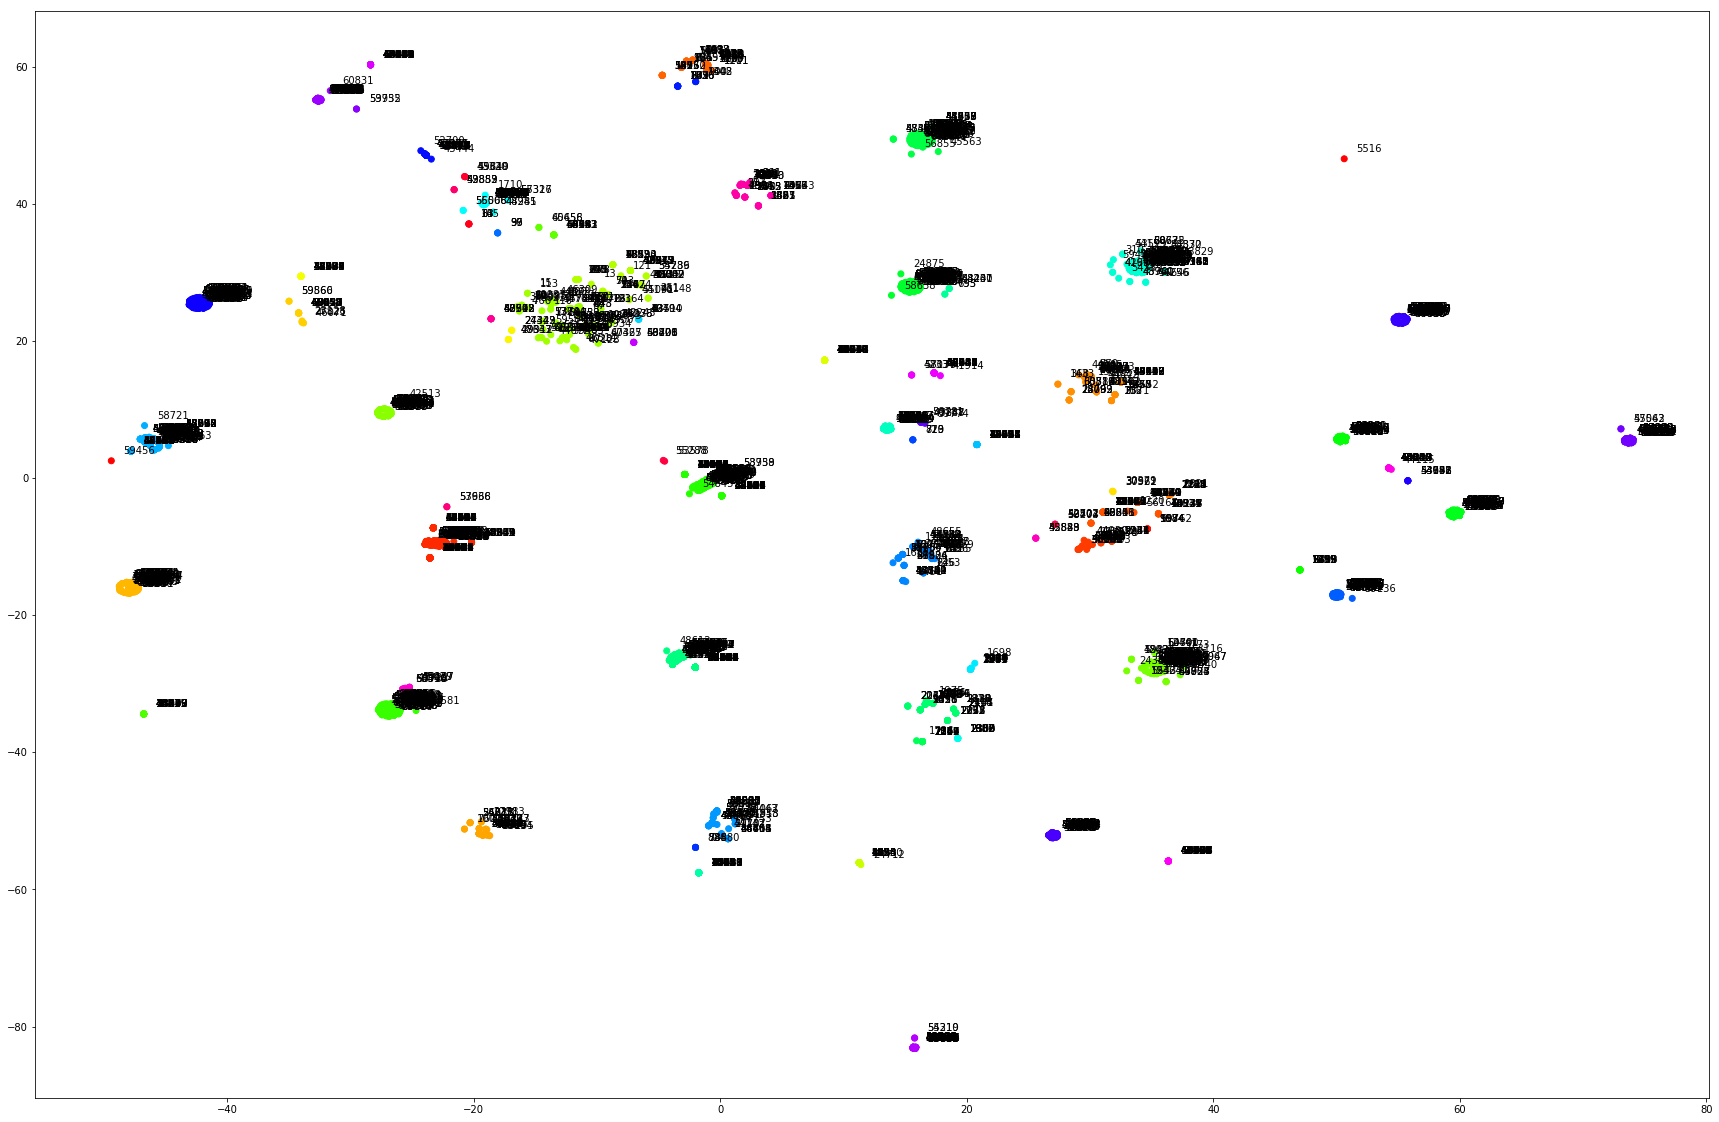

In [39]:
plt.show()

In [30]:
entity_resolution_engine.get_pairs(threshold=0.6)

KeyboardInterrupt: 

In [40]:
for cluster in entity_resolution_engine.product_clusters:
    for spec_id in cluster:
        print(dataset_df.loc[spec_id][['page_title']].values)
    print('-------------------')

[['rain cover for canon eos digital slr & nikon d series camera pentax ++ - buy rain cover,camera rain cover,rain cover for camera product on alibaba.com']
 ['rain cover for canon eos digital slr & nikon d series camera pentax ++ - buy rain cover,camera rain cover,rain cover for camera product on alibaba.com']]
['canon eos digital xt silver ef s 18 55 kit camera dslr gently used | ebay']
-------------------
['canon eos 550d dslr camera best price in india 2014, specs and review | valid in delhi, mumbai, bangalore, hyderabad, chennai, kolkata, ahmedabad, surat | price-hunt']
['canon eos 550d dslr kit ef-s18-55mm is black price in india with offers, reviews & full specifications | pricedekho.com']
['canon eos 550d dslr kit ef-s18-135mm is ii black price in india with offers, reviews & full specifications | pricedekho.com']
['canon eos 550d dslr body black price in india with offers, reviews & full specifications | pricedekho.com']
[['canon camera eos 550d bag 3 cd | ebay']
 ['canon camer

['new canon eos 1dx dslr camera body 17 40mm 70 200mm lens 16gb professional kit 013803145410 | ebay']
['canon eos 60da dslr astrophotography camera 013803151701 | ebay']
['canon eos 30d dslr 715nm standard ir infrared converted camera | ebay']
-------------------
['canon eos 60d dslr camera best price in india 2014, specs and review | valid in delhi, mumbai, bangalore, hyderabad, chennai, kolkata, ahmedabad, surat | price-hunt']
['canon eos 70d dslr camera best price in india 2014, specs and review | valid in delhi, mumbai, bangalore, hyderabad, chennai, kolkata, ahmedabad, surat | price-hunt']
['canon eos 60d dslr camera rs.48500 price in india - buy canon eos 60d dslr camera black online - canon : flipkart.com']
['buy canon eos 70d dslr camera with 18-135mm lens cameras - digital - slr 8469b016 today at pc connection']
['buy canon eos 70d dslr camera (body only) cameras - digital - slr 8469b002 today at pc connection']
['buy canon eos 70d dslr camera with 18-55mm lens cameras - digi

['canon eos 60d 18 0 mp digital slr camera black body only 013803129052 | ebay']
['canon eos 60d 18 0 mp digital slr camera black body only 013803129052 | ebay']
['canon eos 60d 18 0 mp digital slr camera black body only 013803129052 | ebay']
['canon eos 60d 18 0 mp dslr black body only used great condition 2 batteries 013803129052 | ebay']
['canon eos 60d 18 0 mp digital slr camera black body only 013803129052 | ebay']
['canon eos 60d 18 0 mp dslr camera kit w ef s is 18 135mm lens w extras 013803129113 | ebay']
['canon eos 60d 18 0 mp digital slr camera black kit w ef s is 18 55mm lens | ebay']
['canon eos 60d 18 0 mp digital slr w 35 80mm lens 013803129052 | ebay']
['canon eos 60d 18 0 mp digital slr camera kit w ef s is 18 135mm many extras 013803129113 | ebay']
['canon eos 60d 18 0 mp digital slr camera black body only 013803129052 | ebay']
['canon eos 60d 18 mp cmos digital slr camera bundle with lens flash 013803129052 | ebay']
['canon eos 60d 18 mp digital slr camera black kit 

['canon camera eos 400d digital ds126151 | ebay']
['canon eos 20d digital slr camera body only | ebay']
['canon eos 10d digital dslr body strap software battery charger 6 3mp | ebay']
['canon eos d30 digital slr camera body 3 2 mp w battery grip bg ed3 cf card 082966162046 | ebay']
['canon eos 1dx digital slr camera canon ef 200 400mm f 4l is usm w 1 4x 013803145410 | ebay']
['canon eos 1dx digital slr camera 5253b002 1d x body only new 013803145410 | ebay']
['canon eos 50d digital slr body only in good condition eos 50d 013803129052 | ebay']
['canon eos 1dx digital slr camera 5253b002 1d x body only bnib 013803145410 | ebay']
['canon eos 20d digital slr camera w bg e2n battery grip | ebay']
['canon eos 40d digital slr camera black body only | ebay']
['canon eos d30 digital slr 3 2 mp w canon 35 80mm 1 4 5 5 6 lens 082966162046 | ebay']
['canon eos 30d digital slr camera body only | ebay']
['8 mp converted to infrared canon eos 350d digital slr camera 720nm ir filter | ebay']
['canon e

In [41]:
entity_resolution_engine.output_df

,left_spec_id,right_spec_id,left_page_title,right_page_title


----------------------

In [19]:
labelled_df = pd.read_csv('../datasets/sigmod_large_labelled_dataset.csv')

labelled_index = list(set(list(labelled_df.left_spec_id.values)+list(labelled_df.right_spec_id.values)))

labelled_data_df = dataset_df.loc[labelled_index]

In [20]:
entity_resolution_engine = EntityResolutionEngine(model,labelled_data_df,labelled_df)